In [18]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, GRU
from keras.layers import LSTM, Reshape, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split

import numpy as np
import os
from mido import MidiFile, MidiTrack, Message
import mido

from random import randrange
import NoteBins

import matplotlib.pyplot as plt

In [2]:
paths = []
songs = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\blues"):
    for file in f:
        if '.mid' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    mid = MidiFile(path, type = 1)
    songs.append(mid)

In [3]:
notes = []
dataset = []
fuckboy = []

In [4]:
#for each in midi object in list of songs
for i in range(len(songs)):
    #for each note in midi object
    for msg in songs[i]:
        #filtering out meta messages
        if not msg.is_meta:
            #filtering out control changes
            if (msg.type == 'note_on'):
                #normalizing note and velocity values
                notes.append([NoteBins.note_reg(msg.note)/11])
    for i in range(1, len(notes)):
        fuckboy.append(notes[i])
        if (i % 12 == 0):
            dataset.append(fuckboy)
            fuckboy = []
    fuckboy = []
    notes = []

In [5]:
dataset = np.array(dataset)
dataset.shape

(4678, 12, 1)

In [6]:
bruv = []
#for each in midi object in list of songs
for i in range(len(songs)):
    #for each note in midi object
    for msg in songs[i]:
        #filtering out meta messages
        if not msg.is_meta:
            #filtering out control changes
            if (msg.type == 'note_on'):
                #normalizing note and velocity values
                notes.append([NoteBins.note_reg(msg.note)/11])
    for i in range(1, len(notes)):
        fuckboy.append(notes[i])
        if (i % 12 == 0):
            bruv.append(fuckboy[0:4])
            fuckboy = []
    fuckboy = []
    notes = []

In [7]:
bruv = np.array(bruv)
bruv.shape

(4678, 4, 1)

In [8]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(bruv, dataset, test_size=0.4, shuffle=False, random_state=42)

In [59]:
# define model
model = Sequential()
#shaping input to match data
model.add(LSTM(128, activation = 'relu', input_shape=(4, 1)))
#specifying output to have 40 timesteps
model.add(RepeatVector(12))
#specifying 1 feature as the output
model.add(LSTM(256, activation = 'relu', return_sequences=True, dropout = 0.3))
model.add(LSTM(512, activation = 'relu', return_sequences=True, dropout = 0.3))
model.add(TimeDistributed(Dense(1024, activation = 'selu')))
model.add(TimeDistributed(Dense(2048, activation = 'selu')))
model.add(TimeDistributed(Dense(1, activation = 'linear')))
model.compile(loss='mean_absolute_error', optimizer='adam')
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 128)               66560     
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 12, 128)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 12, 256)           394240    
_________________________________________________________________
lstm_25 (LSTM)               (None, 12, 512)           1574912   
_________________________________________________________________
time_distributed_9 (TimeDist (None, 12, 1024)          525312    
_________________________________________________________________
time_distributed_10 (TimeDis (None, 12, 2048)          2099200   
_________________________________________________________________
time_distributed_11 (TimeDis (None, 12, 1)            

In [60]:
history = model.fit(bruv, dataset, epochs=20, batch_size=1000, verbose=1,validation_data=(x_test, y_test))

Train on 4678 samples, validate on 1872 samples
Epoch 1/20
4678/4678 [==============================] - 2s 377us/step - loss: 0.4210 - val_loss: 0.3494
Epoch 2/20
4678/4678 [==============================] - 1s 115us/step - loss: 0.3010 - val_loss: 0.2985
Epoch 3/20
4678/4678 [==============================] - 1s 116us/step - loss: 0.2799 - val_loss: 0.2744
Epoch 4/20
4678/4678 [==============================] - 1s 119us/step - loss: 0.2755 - val_loss: 0.2700
Epoch 5/20
4678/4678 [==============================] - 1s 118us/step - loss: 0.2700 - val_loss: 0.2780
Epoch 6/20
4678/4678 [==============================] - 1s 119us/step - loss: 0.2687 - val_loss: 0.2716
Epoch 7/20
4678/4678 [==============================] - 1s 119us/step - loss: 0.2703 - val_loss: 0.2702
Epoch 8/20
4678/4678 [==============================] - 1s 116us/step - loss: 0.2684 - val_loss: 0.2743
Epoch 9/20
4678/4678 [==============================] - 1s 117us/step - loss: 0.2675 - val_loss: 0.2715
Epoch 10/20
4678

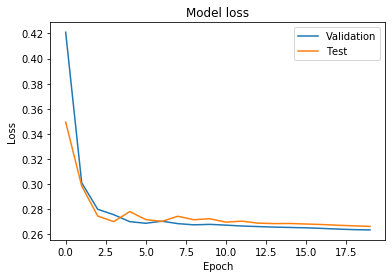

In [62]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Test'], loc='upper right')
plt.show()

In [67]:
j = 0
fuckie = [[[30], [25], [92], [120]]]
fuckie = np.array(fuckie)
fuckie.reshape(1,4,1)

jamie = model.predict_on_batch(fuckie)

In [68]:
#adjusting from normalization
for x in range(12):
    jamie[0][x][0] = abs(jamie[0][x][0] * 11)
    while(jamie[0][x][0] > 127):
        jamie[0][x][0] = jamie[0][x][0] / 10

In [69]:
timing = np.load('csp.npy',allow_pickle=True)

#jamie[0][0][0]

In [70]:
#forced mode
mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)
octave = 12 * 5
t = randrange(len(timing))

track.append(Message('program_change', program=2,time=0))
for x in range(5):
    for i in range(12):
        track.append(Message('note_on', note= octave + NoteBins.note_reg(int(jamie[0][i][0])), velocity=64, time=20))
        track.append(Message('note_off', note= octave + NoteBins.note_reg(int(jamie[0][i][0])), velocity=64, time=timing[t].get(str(i))))
mid.save('jek.mid')

In [36]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('decent.h5')

In [13]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("all.tflite", "wb").write(tflite_model)

AttributeError: type object 'TFLiteConverter' has no attribute 'from_keras_model'

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'